In [1]:
import xarray as xr
import os.path as osp
import _helpers as helper
import matplotlib.pyplot as plt
from venn import venn

import _helpers as helpers

Set directory to read data from

In [2]:
OUTPUT_DIR = '/gstore/data/resbioai/andera29/cci-explore/validation/pipeline/data/results_data/bcell'

Load Intergram results

In [3]:
inter_res = xr.load_dataset(osp.join(OUTPUT_DIR,'inter_res.netcdf'))

Define names of pathways

In [4]:
signature_paths = dict(GO_0042110 = 'T cell activation', #negative
                       GO_0042113 = 'B cell activation', # positive
                       GO_0012501 = 'programmed cell death', #negative
                       )

Get genes present in data

In [5]:
data_genes = inter_res.features.to_numpy().tolist()
data_genes = [x.upper() for x in data_genes]

Read genes in pathways

In [6]:
pws, pws_subs = dict(),dict()
sets, set_names = [], []
pwy_pth_base=  '../../data/signatures/{}.csv'
for fn, fancy_name in signature_paths.items():
    pw = set(helpers.read_signature(pwy_pth_base.format(fn), filter_uniprot=True))
    pws[fancy_name] =set(pw)
    pws_subs[fancy_name] = inter = pw.intersection(set(data_genes))

Plot venn diagram

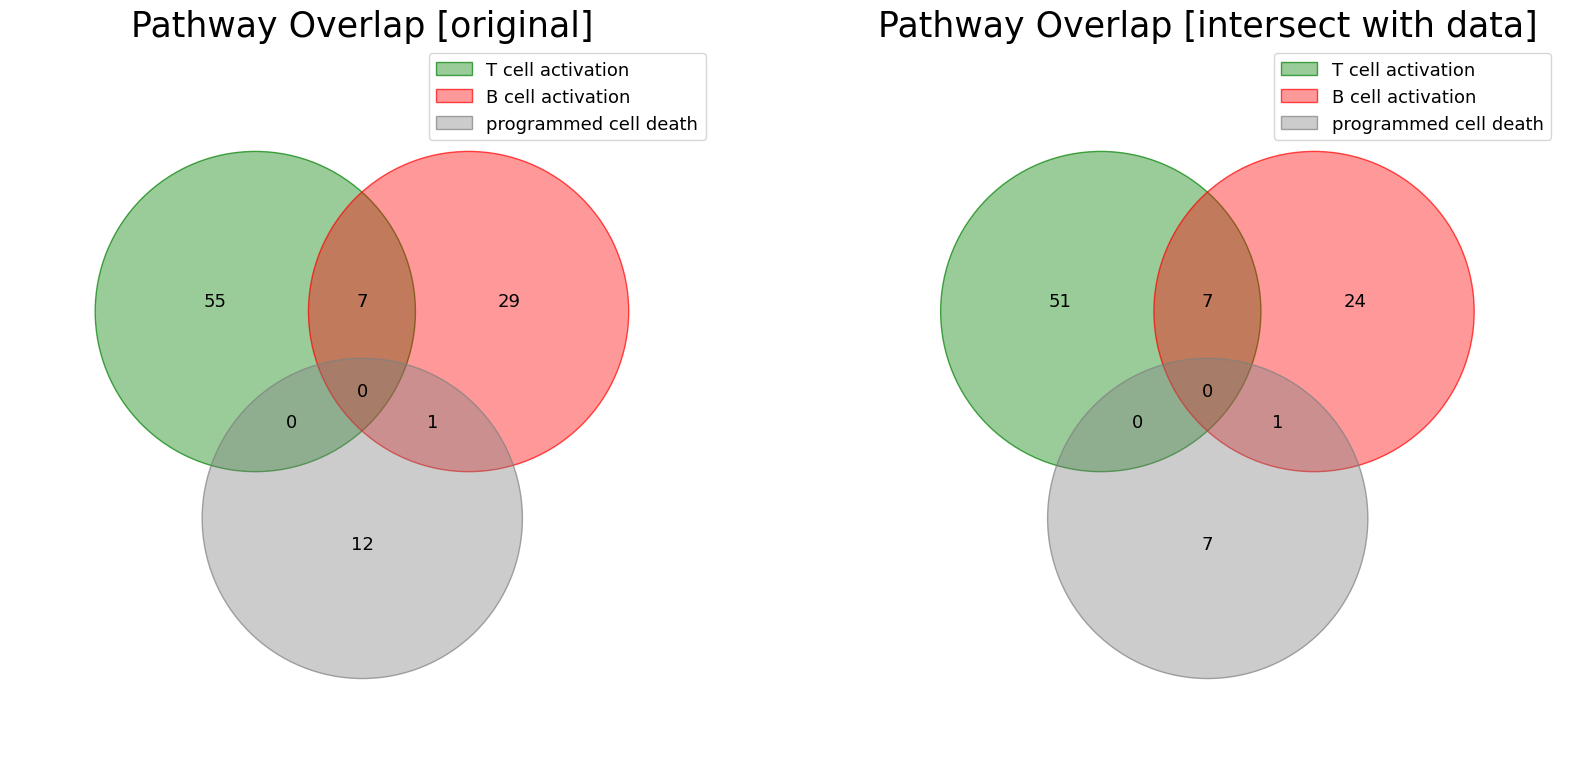

In [7]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

cmap = ['green', 'red', 'gray']

venn(pws, cmap = cmap , ax = ax[0])
ax[0].set_title('Pathway Overlap [original]', fontsize = 25)

venn(pws_subs, cmap = cmap, ax = ax[1])
ax[1].set_title('Pathway Overlap [intersect with data]', fontsize = 25)
plt.show()